In [1]:
import pandas as pd

df = pd.read_csv(r'D:\Projects\Data Analyics Project\IPL SRH vs RCB matches analysis\Dataset\SRH_vs_RCB.csv')

In [2]:
df

,Team,Over Details,Overs,Batter,Bowler,Runs,Extra Runs,Total Runs,Batter Out,Wicket Kind
0,Royal Challengers Bengaluru,0.1,0,Kohli,Abhishek,1,NaN,1,NaN,NaN
1,Royal Challengers Bengaluru,0.2,0,duPlessis,Abhishek,4,NaN,4,NaN,NaN
2,Royal Challengers Bengaluru,0.3,0,duPlessis,Abhishek,0,NaN,0,NaN,NaN
3,Royal Challengers Bengaluru,0.4,0,duPlessis,Abhishek,1,NaN,1,NaN,NaN
4,Royal Challengers Bengaluru,0.5,0,Kohli,Abhishek,0,NaN,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
260,Sunrisers Hyderabad,19.3,19,Markram,Vyshak,1,NaN,1,NaN,NaN
261,Sunrisers Hyderabad,19.4,19,AbdulSamad,Vyshak,0,NaN,0,NaN,NaN
262,Sunrisers Hyderabad,19.5,19,AbdulSamad,Vyshak,6,NaN,6,NaN,NaN
263,Sunrisers Hyderabad,19.6,19,AbdulSamad,Vyshak,0,1.0,1,NaN,NaN


In [3]:
# print(df.dtypes)

In [4]:
total_score = df.groupby(['Team']).apply(lambda x: x['Total Runs'].sum(), include_groups=False).reset_index(name='total_score')

# Display Total Runs for each team
print(total_score)

                          Team  total_score
0  Royal Challengers Bengaluru          262
1          Sunrisers Hyderabad          287


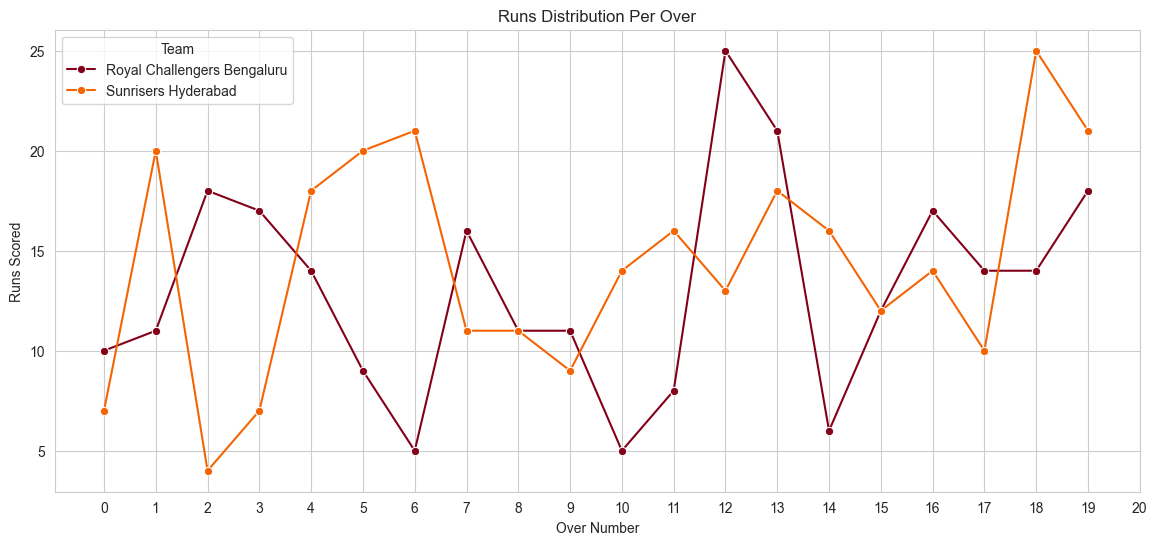

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# data preparation for runs distribution per over
runs_distribution = df.groupby(['Team', 'Overs']).agg({'Total Runs' : 'sum'}).reset_index()

plt.figure(figsize=(14,6))
sns.lineplot(data=runs_distribution, x='Overs', y='Total Runs', hue='Team', marker='o', palette={'Royal Challengers Bengaluru': '#83001a', 'Sunrisers Hyderabad': '#f46404'})
plt.title('Runs Distribution Per Over')
plt.xlabel('Over Number')
plt.ylabel('Runs Scored')
plt.xticks(range(0,21))
plt.legend(title='Team')

plt.show()

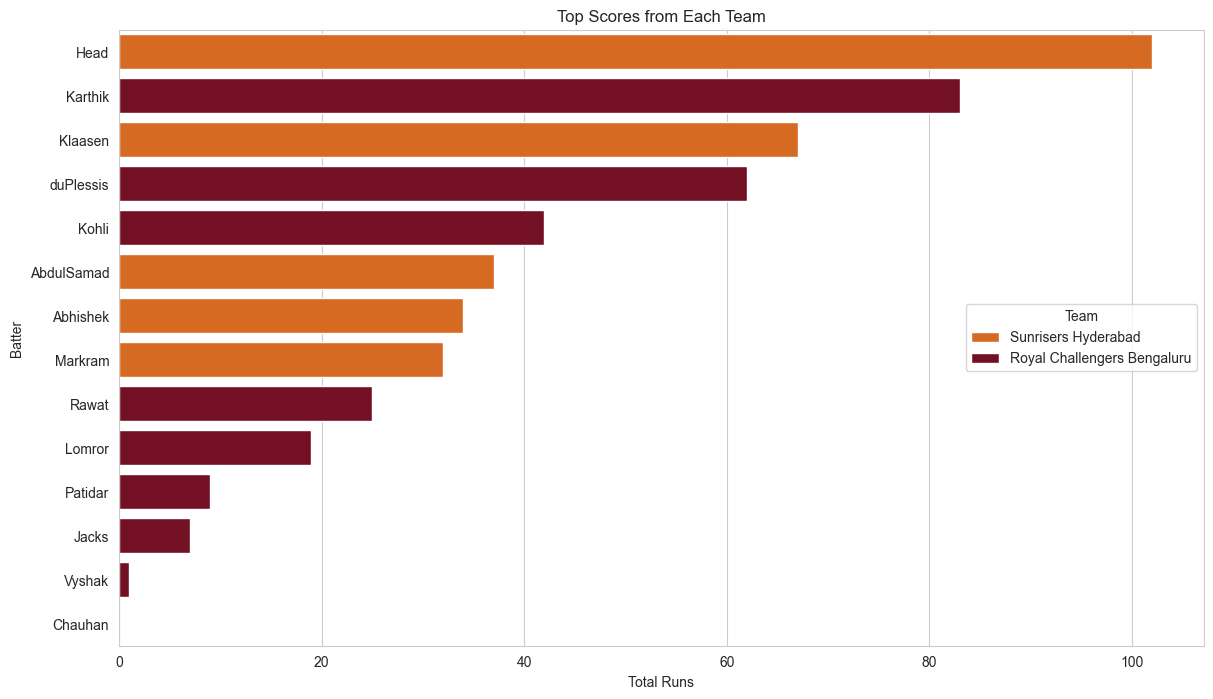

In [6]:
# Calculating top scores for each team
top_scores = df.groupby(['Team','Batter']).agg({'Runs' : 'sum'}).reset_index().sort_values(by='Runs', ascending=False)

plt.figure(figsize=(14,8))
sns.barplot(data=top_scores, x='Runs', y='Batter', hue='Team', dodge=False, palette={'Royal Challengers Bengaluru': '#83001a', 'Sunrisers Hyderabad': '#f46404'})
plt.title("Top Scores from Each Team")
plt.xlabel("Total Runs")
plt.ylabel("Batter")

plt.legend(title='Team', loc = 'center right')
plt.show()

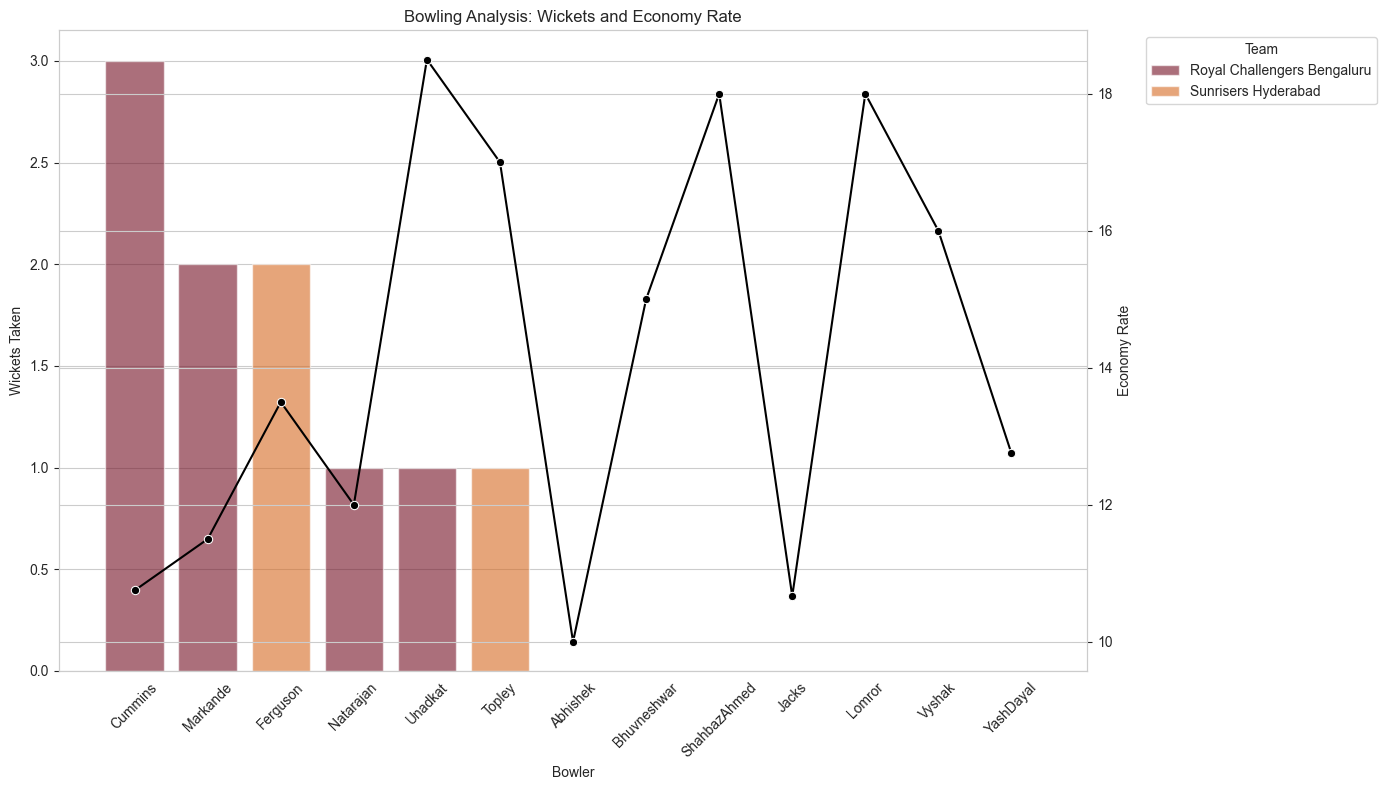

In [7]:
# Bowling Analysis
df["Wickets Taken"] = df['Wicket Kind'].notna()
bowling_stats = df.groupby(['Team', 'Bowler']).agg({'Total Runs' : 'sum', 'Wickets Taken' : 'sum', 'Overs' : 'nunique'}).reset_index()

# Calculating ecomomy rate(total runs conceded/ number of overs bowled)
bowling_stats['Economy Rate'] = bowling_stats['Total Runs'] / bowling_stats['Overs']

# Sorting the data for better visualization
bowling_stats_sorted = bowling_stats.sort_values(by='Wickets Taken', ascending=False)

# create the plot
fig,ax1 = plt.subplots(figsize=(14,8))

# Barplot for wickets
sns.barplot(data=bowling_stats_sorted, x='Bowler', y='Wickets Taken', hue='Team', ax = ax1, alpha=0.6, palette={'Royal Challengers Bengaluru': '#83001a', 'Sunrisers Hyderabad': '#f46404'})

ax1.set_ylabel('Wickets Taken')
ax1.set_xlabel('Bowler')
ax1.set_title('Bowling Analysis: Wickets and Economy Rate')
ax1.legend(title='Team', bbox_to_anchor=(1.05,1), loc='upper left')

for item in ax1.get_xticklabels():
    item.set_rotation(45)

# Secondary Y-axis for economy rate
ax2 = ax1.twinx()
sns.lineplot(data=bowling_stats_sorted, x='Bowler', y='Economy Rate', marker='o', sort=False, ax=ax2, color='black')
ax2.set_ylabel('Economy Rate')

plt.tight_layout()
plt.show()

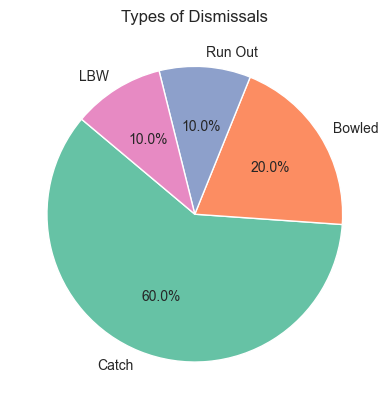

In [8]:
# Dismissal Types

dismissal_types = df['Wicket Kind'].dropna().value_counts()
plt.figure(figure=(8,8))
plt.pie(dismissal_types, labels=dismissal_types.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title('Types of Dismissals')
plt.show()

In [9]:
# PartnerShips Analysis
# Retriving the Partners
# For RCB
# RCB_batter_order = df.loc[df['Team'] == 'Royal Challengers Bengaluru', 'Batter'].unique().tolist()
RCB_batter_order =  ['Kohli', 'duPlessis', 'Jacks', 'Patidar', 'Chauhan' , 'Karthik', 'Lomror', 'Rawat', 'Vyshak']
RCB_batter_out = df.loc[df['Team'] == 'Royal Challengers Bengaluru', 'Batter Out'].dropna().unique().tolist()

print('RCB_batter_order : ', RCB_batter_order)


RCB_striker = RCB_batter_order[0]                                                                                  # type: ignore
RCB_non_striker = RCB_batter_order[1]                                                                              # type: ignore

RCB_partners = []
RCB_partners.append([RCB_striker, RCB_non_striker])

for i in df['Batter Out']:
    if(i in RCB_batter_out):                                                                                   # type: ignore
        RCB_batter_order.remove(i)                                                                             # type: ignore
        RCB_partners.append([RCB_batter_order[0], RCB_batter_order[1]])                                            # type: ignore



# For SRH
# SRH_batter_order = df.loc[df['Team'] == 'Sunrisers Hyderabad', 'Batter'].unique().tolist()
SRH_batter_order =  ['Abhishek', 'Head', 'Klaasen', 'Markram', 'AbdulSamad']
SRH_batter_out = df.loc[df['Team'] == 'Sunrisers Hyderabad', 'Batter Out'].dropna().unique().tolist()


print('SRH_batter_order : ', SRH_batter_order)

print()

SRH_striker = SRH_batter_order[0]                                                                                  # type: ignore
SRH_non_striker = SRH_batter_order[1]                                                                              # type: ignore

SRH_partners = []
SRH_partners.append([SRH_striker, SRH_non_striker])

for i in df['Batter Out']:
    if(i in SRH_batter_out):                                                                                   # type: ignore
        SRH_batter_order.remove(i)                                                                             # type: ignore
        SRH_partners.append([SRH_batter_order[0], SRH_batter_order[1]])                                            # type: ignore


print('--------- RCB -------------')
print('RCB_batter_order : ', RCB_batter_order)
print('RCB_batter_out   : ', RCB_batter_out)
print('RCB_partners     : ',RCB_partners)

print()
print('--------- SRH -------------')
print()

print('SRH_batter_order : ', SRH_batter_order)
print('SRH_batter_out   : ', SRH_batter_out)
print('SRH_partners     : ', SRH_partners)

RCB_batter_order :  ['Kohli', 'duPlessis', 'Jacks', 'Patidar', 'Chauhan', 'Karthik', 'Lomror', 'Rawat', 'Vyshak']
SRH_batter_order :  ['Abhishek', 'Head', 'Klaasen', 'Markram', 'AbdulSamad']

--------- RCB -------------
RCB_batter_order :  ['Rawat', 'Vyshak']
RCB_batter_out   :  ['Kohli', 'Jacks', 'Patidar', 'duPlessis', 'Chauhan', 'Lomror', 'Karthik']
RCB_partners     :  [['Kohli', 'duPlessis'], ['duPlessis', 'Jacks'], ['duPlessis', 'Patidar'], ['duPlessis', 'Chauhan'], ['Chauhan', 'Karthik'], ['Karthik', 'Lomror'], ['Karthik', 'Rawat'], ['Rawat', 'Vyshak']]

--------- SRH -------------

SRH_batter_order :  ['Markram', 'AbdulSamad']
SRH_batter_out   :  ['Abhishek', 'Head', 'Klaasen']
SRH_partners     :  [['Abhishek', 'Head'], ['Head', 'Klaasen'], ['Klaasen', 'Markram'], ['Markram', 'AbdulSamad']]


In [10]:
# Creating a list for non_strikers

batter = df['Batter']
wicket_taken = df['Wickets Taken']
team = df['Team']
partners = RCB_partners + SRH_partners

index = 0

SRH_non_strikers = []
RCB_non_strikers = []

for i in range(len(batter)):
    if(team[i] == 'Royal Challengers Bengaluru'):
        # print(partners[index])
        # print()
        if(wicket_taken[i] == False):
            if(batter[i] == partners[index][0]):
                # print(f"print(partners[{index}][1]): ", partners[index][1])
                RCB_non_strikers.append(RCB_partners[index][1])
            else:
                # print(f"print(partners[{index}][0]): ", partners[index][0])
                RCB_non_strikers.append(RCB_partners[index][0])

            
        else:
            index += 1
            # print(partners[index])
            if(batter[i] == partners[index][0]):
                # print(f"print(partners[{index}][1]): ", partners[index][1])
                RCB_non_strikers.append(RCB_partners[index][1])
            else:
                RCB_non_strikers.append(RCB_partners[index][0])
                # print(f"print(partners[{index}][0]): ", partners[index][0])

index = 0  
for i in range(133, len(batter)):
    if(team[i] == 'Sunrisers Hyderabad'):
        # print(partners[index])
        # print()
        if(wicket_taken[i] == False):
            if(batter[i] == SRH_partners[index][0]):
                # print(f"print(partners[{index}][1]): ", partners[index][1])
                SRH_non_strikers.append(SRH_partners[index][1])
            else:
                # print(f"print(partners[{index}][0]): ", partners[index][0])
                SRH_non_strikers.append(SRH_partners[index][0])

            
        else:
            index += 1
            # print(partners[index])
            if(batter[i] == partners[index][0]):
                # print(f"print(partners[{index}][1]): ", partners[index][1])
                SRH_non_strikers.append(SRH_partners[index][1])
            else:
                SRH_non_strikers.append(SRH_partners[index][0])
                # print(f"print(partners[{index}][0]): ", partners[index][0])

# count = 1
# for i,j in zip(df['Batter'],non_strikers):
#     if(i==j):
#         print(True)

non_strikers = []
non_strikers = RCB_non_strikers + SRH_non_strikers
# Adding a new column called Non Strikers

df['Non Striker'] = non_strikers
cols = ['Team', 'Over Details', 'Overs', 'Batter', 'Bowler', 'Non Striker', 'Runs', 'Extra Runs', 'Total Runs', 'Batter Out', 'Wicket Kind']
df = df[cols]

In [11]:
# Partnership Analysis
# function to calculate partnerships
def calculate_partnerships(df):
    partnerships = []
    current_partnership = {}
    for i, row in df.iterrows():
        if i == 0 or (row['Batter'] not in current_partnership.values()):
            if current_partnership:
                partnerships.append(current_partnership)
            current_partnership = {
                'Team': row['Team'],
                'batter1': row['Batter'],
                'batter2': row['Non Striker'],
                'runs': 0,
                'balls': 0
            }
        current_partnership['runs'] += row['Total Runs']
        current_partnership['balls'] += 1
        if 'Batter Out' in row and pd.notna(row['Batter Out']):
            if row['Batter Out'] == current_partnership['batter1'] or row['Batter Out'] == current_partnership['batter2']:
                partnerships.append(current_partnership)
                current_partnership = {}
    # append the last partnership if not ended by a wicket
    if current_partnership:
        partnerships.append(current_partnership)
    return partnerships

# calculate partnerships
partnerships_data = calculate_partnerships(df)
partnerships_df = pd.DataFrame(partnerships_data)

# filter out significant partnerships (e.g., partnerships with more than 20 runs)
significant_partnerships = partnerships_df[partnerships_df['runs'] > 20]

# sort by highest runs
significant_partnerships = significant_partnerships.sort_values(by='runs', ascending=False)

# Create a new column for concatenated batter names
significant_partnerships['batter_pair'] = significant_partnerships['batter1'] + ' & ' + significant_partnerships['batter2']


significant_partnerships


,Team,batter1,batter2,runs,balls,batter_pair
8,Sunrisers Hyderabad,Abhishek,Head,108,51,Abhishek & Head
0,Royal Challengers Bengaluru,Kohli,duPlessis,80,38,Kohli & duPlessis
10,Sunrisers Hyderabad,Markram,Klaasen,66,30,Markram & Klaasen
6,Royal Challengers Bengaluru,Rawat,Karthik,63,34,Rawat & Karthik
5,Royal Challengers Bengaluru,Karthik,Lomror,59,31,Karthik & Lomror
9,Sunrisers Hyderabad,Klaasen,Head,57,30,Klaasen & Head
11,Sunrisers Hyderabad,Markram,AbdulSamad,56,21,Markram & AbdulSamad


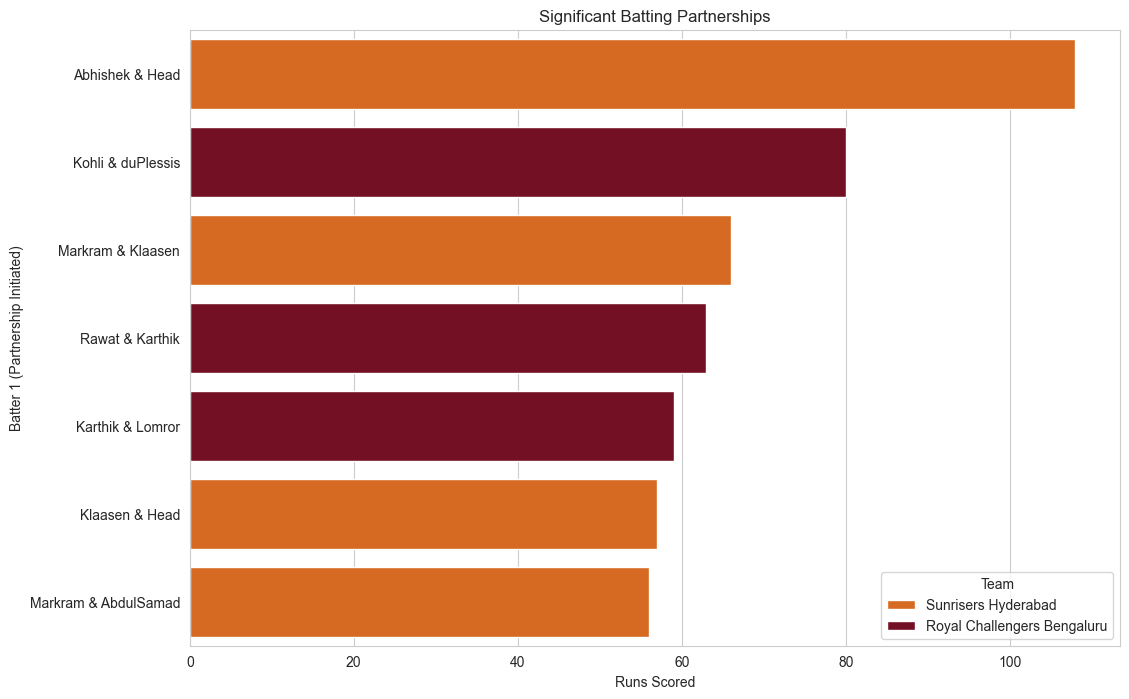

In [12]:
plt.figure(figsize=(12, 8))
sns.barplot(data=significant_partnerships, x='runs', y='batter_pair', hue='Team', dodge=False,  palette={'Royal Challengers Bengaluru': '#83001a', 'Sunrisers Hyderabad': '#f46404'})
plt.title('Significant Batting Partnerships')
plt.xlabel('Runs Scored')
plt.ylabel('Batter 1 (Partnership Initiated)')
plt.legend(title='Team')
plt.show()

In [13]:
# Create 'Wickets Taken' column based on 'Wicket Kind' column
df['Wickets Taken'] = df['Wicket Kind'].apply(lambda x: False if pd.isna(x) else True)

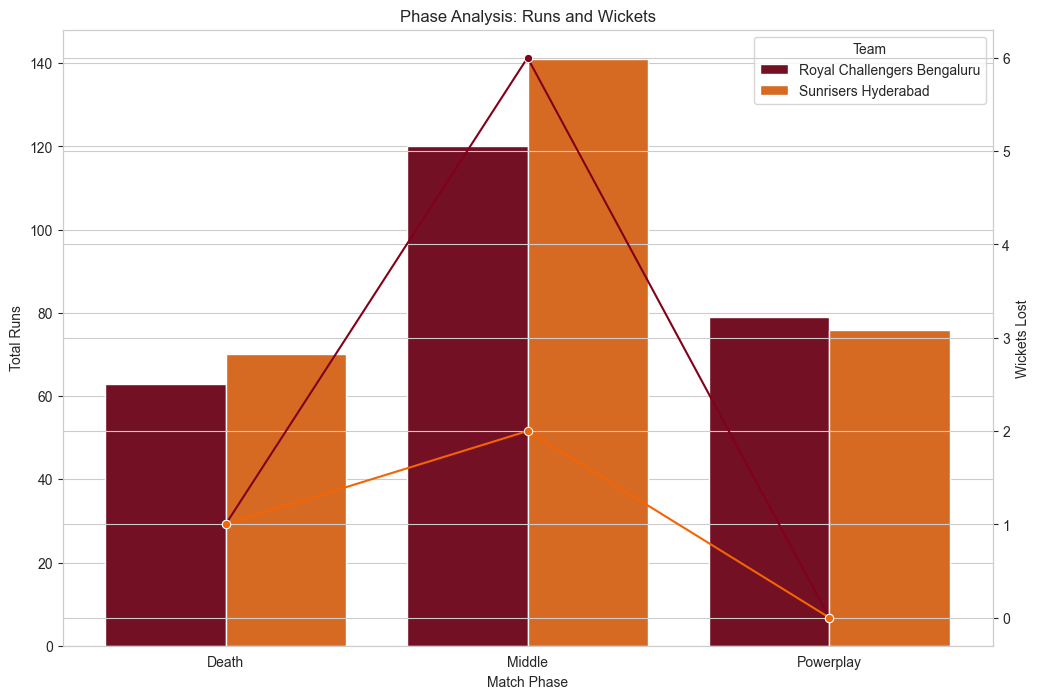

In [14]:
def classify_phase(over):
    if(over < 6):
        return 'Powerplay'
    elif(over < 16):
        return 'Middle'
    else:
        return 'Death'
    
# Adding phase information to the dataframe
df['Phase'] = df['Overs'].apply(classify_phase)

# Groupingg data by phase and team to calculate runs and wickets
phase_analysis = df.groupby(['Team', 'Phase']).agg({'Total Runs' : 'sum', 'Wickets Taken' : 'sum', 'Overs' : 'count'}).rename(columns={'Overs' : 'Balls'}).reset_index()

# Calculating run rate
phase_analysis['Run Rate'] = (phase_analysis['Total Runs'] / phase_analysis['Balls']) * 6

#  Plotting the Phase Analysis
fig, ax1 = plt.subplots(figsize=(12,8))

# Bar plot for runs scored in each phase
sns.barplot(data=phase_analysis, x='Phase', y='Total Runs', hue='Team', ax = ax1, palette={'Royal Challengers Bengaluru': '#83001a', 'Sunrisers Hyderabad': '#f46404'})

ax1.set_title('Phase Analysis: Runs and Wickets')
ax1.set_ylabel('Total Runs')
ax1.set_xlabel('Match Phase')

# Line plot for wickets lost
ax2 = ax1.twinx()
sns.lineplot(data=phase_analysis, x='Phase', y='Wickets Taken', hue='Team', marker='o', ax=ax2, legend=False, palette={'Royal Challengers Bengaluru': '#83001a', 'Sunrisers Hyderabad': '#f46404'})

ax2.set_ylabel('Wickets Lost')

plt.show()

In [15]:
# Calculate runs and balls faced by each batter
batter_stats = df.groupby('Batter').agg({'Runs' : 'sum', 'Overs' : 'count'}).rename(columns={'Overs' : "Balls Faced"}).reset_index()

# Calculate strike rate for each batter (runs per 100 balls)
batter_stats['Strike Rate'] = (batter_stats['Runs'] / batter_stats['Balls Faced'])*100

# Sorting batters by their strike rate
batter_stats_sorted = batter_stats.sort_values(by='Strike Rate', ascending=False)

# Displaying calculated strike rates along with runs scored and balls faced
batter_stats_sorted.head(10)

,Batter,Runs,Balls Faced,Strike Rate
0,AbdulSamad,37,11,336.363636
3,Head,102,45,226.666667
13,duPlessis,62,28,221.428571
7,Kohli,42,20,210.000000
5,Karthik,83,43,193.023256
6,Klaasen,67,35,191.428571
9,Markram,32,18,177.777778
4,Jacks,7,4,175.000000
11,Rawat,25,15,166.666667
10,Patidar,9,6,150.000000


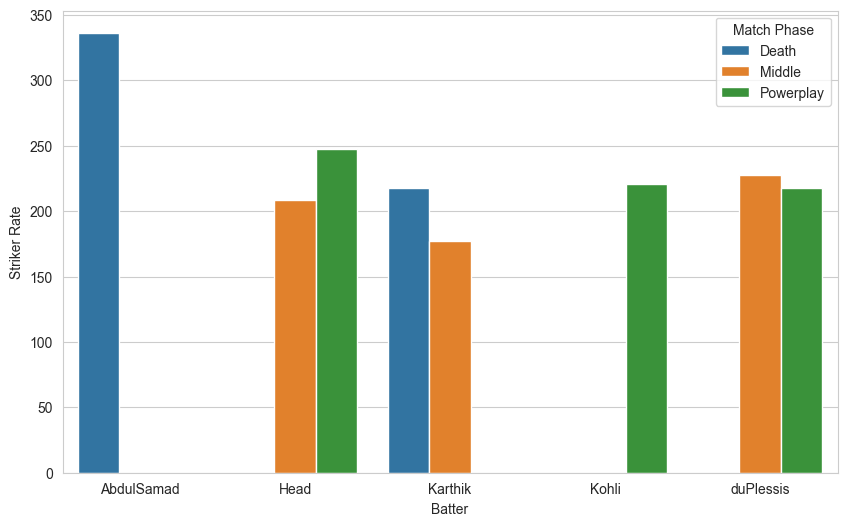

In [16]:
# Merging phase information with batter stats
batter_phase_stats = df.groupby(['Batter', 'Phase']).agg({'Runs' : 'sum', 'Overs' : 'count'}).rename(columns={'Overs' : "Balls Faced"}).reset_index()

# Calculate strike rate for each batter-phase combination
batter_phase_stats['Strike Rate'] = (batter_phase_stats['Runs'] / batter_phase_stats['Balls Faced']) * 100

# Filtering for top performers based on overall strike rate
top_performers = batter_stats_sorted.head(5)['Batter']
batter_phase_stats_top = batter_phase_stats[batter_phase_stats['Batter'].isin(top_performers)]

# Plotting strike rate across different phases for top performers
plt.figure(figsize=(10,6))
sns.barplot(data=batter_phase_stats_top, x='Batter', y='Strike Rate', hue='Phase')
plt.xlabel('Batter')
plt.ylabel('Striker Rate')
plt.legend(title='Match Phase')
plt.show()

C:\Users\odula\AppData\Local\Temp\ipykernel_9372\2380204893.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RCB_deliveries['Over Ball'] = RCB_deliveries['Overs'] + (RCB_deliveries.groupby('Overs').cumcount() + 1)/6
C:\Users\odula\AppData\Local\Temp\ipykernel_9372\2380204893.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SRH_deliveries['Over Ball'] = SRH_deliveries['Overs'] + (SRH_deliveries.groupby('Overs').cumcount() + 1)/6


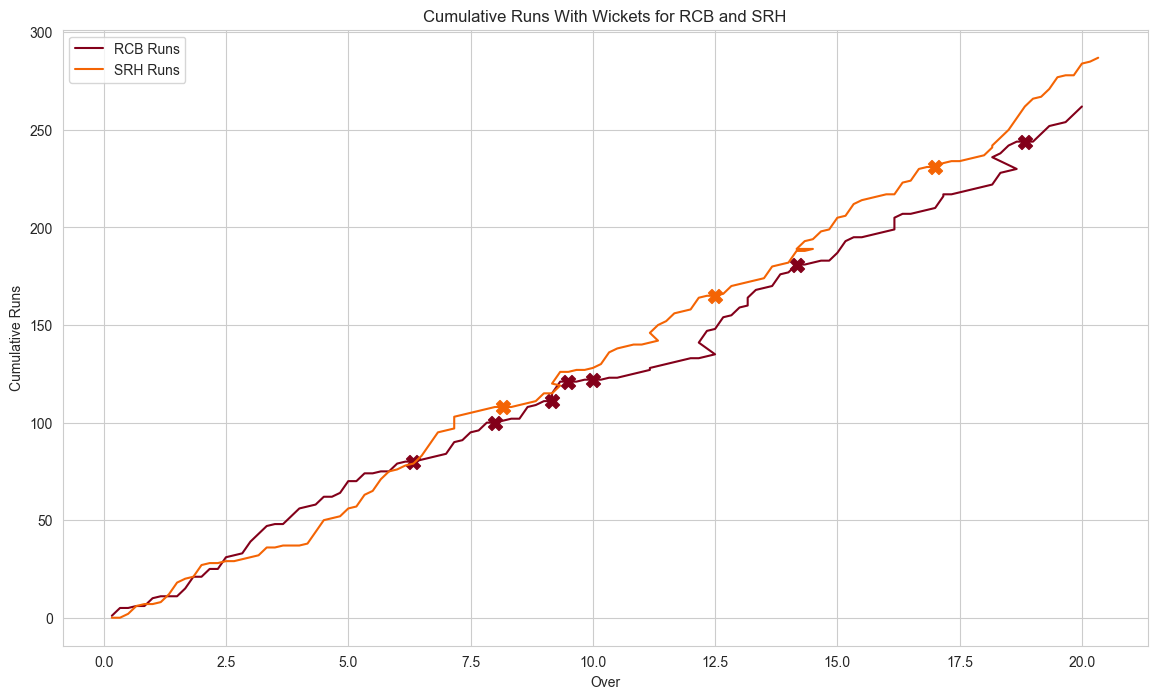

In [17]:
# Calculate cumulative runs and wickets for each ball for both teams
df['Cumulative Runs'] = df.groupby('Team')['Total Runs'].cumsum()
df['Cumulative Wickets'] = df.groupby('Team')['Wickets Taken'].cumsum()

# print(df['Cumulative Runs'])
# print(df['Cumulative Wickets'])

# Separate data fr both teams
RCB_deliveries = df[df['Team'] == 'Royal Challengers Bengaluru']
SRH_deliveries = df[df['Team'] == 'Sunrisers Hyderabad']



# Calculating over for cumulative analysis
RCB_deliveries['Over Ball'] = RCB_deliveries['Overs'] + (RCB_deliveries.groupby('Overs').cumcount() + 1)/6
SRH_deliveries['Over Ball'] = SRH_deliveries['Overs'] + (SRH_deliveries.groupby('Overs').cumcount() + 1)/6

# Plot cumulative run rates and wickets
fig, ax = plt.subplots(figsize=(14,8))

# Plot for RCB
ax.plot(RCB_deliveries['Over Ball'], RCB_deliveries['Cumulative Runs'], color='#83001a', label='RCB Runs')
ax.scatter(RCB_deliveries[RCB_deliveries['Wickets Taken'] == 1]['Over Ball'], RCB_deliveries[RCB_deliveries['Wickets Taken'] == 1]['Cumulative Runs'], color='#83001a', marker='X', s=100)

# Plot for SRH
ax.plot(SRH_deliveries['Over Ball'], SRH_deliveries['Cumulative Runs'], color='#f46404', label='SRH Runs')
ax.scatter(SRH_deliveries[SRH_deliveries['Wickets Taken'] == 1]['Over Ball'], SRH_deliveries[SRH_deliveries['Wickets Taken'] == 1]['Cumulative Runs'], color='#f46404', marker='X', s=100)


ax.set_title('Cumulative Runs With Wickets for RCB and SRH')
ax.set_xlabel('Over')
ax.set_ylabel('Cumulative Runs')
ax.legend()
plt.show()



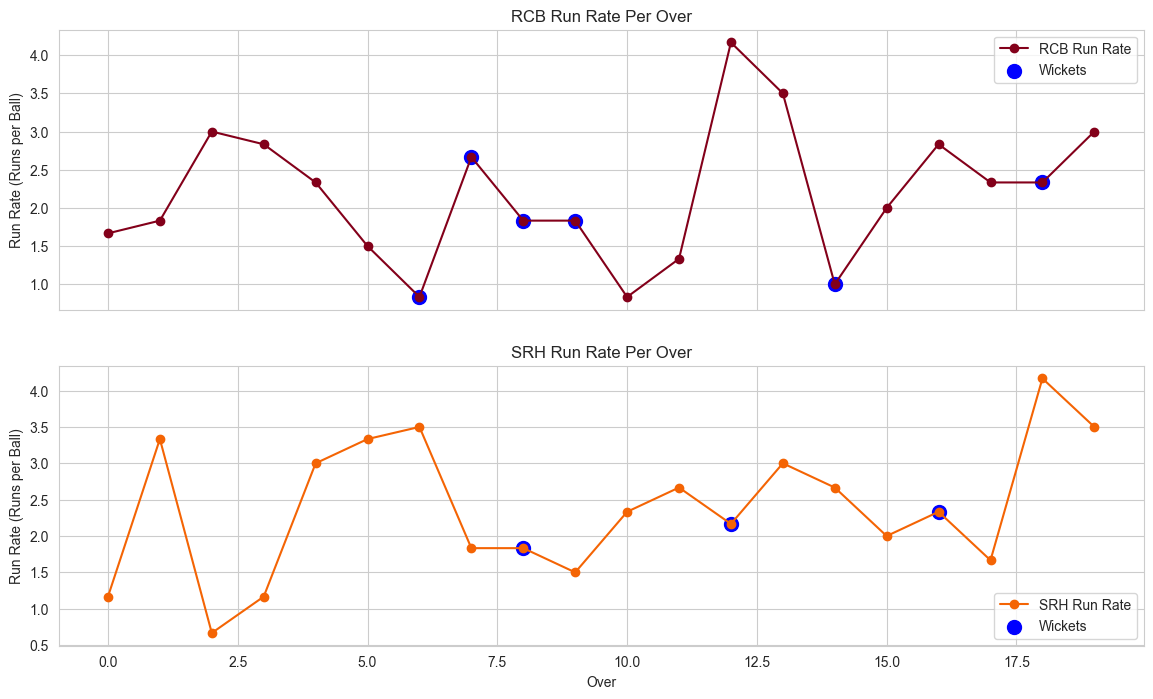

In [18]:
# Calculate runs and wickets per over for both teams
per_over_stats = df.groupby(['Team', 'Overs']).agg({'Total Runs' : 'sum', 'Wickets Taken' : 'sum'}).reset_index()

# Calculate run rante for each over
per_over_stats['Run Rate'] = (per_over_stats['Total Runs']/6) #runs per over to runs per ball (Standard rate)

# Separate data for RCB and SRH for plotting
RCB_per_over_stats = per_over_stats[per_over_stats['Team'] == 'Royal Challengers Bengaluru']
SRH_per_over_stats = per_over_stats[per_over_stats['Team'] == 'Sunrisers Hyderabad']

# Plotting run rates and making wickets for each team
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(14,8), sharex=True)

# RCB
ax1.plot(RCB_per_over_stats['Overs'], RCB_per_over_stats['Run Rate'], marker='o', color='#83001a', label='RCB Run Rate')
ax1.scatter(RCB_per_over_stats[RCB_per_over_stats['Wickets Taken']>0]['Overs'], RCB_per_over_stats[RCB_per_over_stats['Wickets Taken']>0]['Run Rate'], color='blue', s=100, label='Wickets')
ax1.set_title('RCB Run Rate Per Over')
ax1.set_ylabel('Run Rate (Runs per Ball)')
ax1.legend()

# SRH
ax2.plot(SRH_per_over_stats['Overs'], SRH_per_over_stats['Run Rate'], marker='o', color='#f46404', label='SRH Run Rate')
ax2.scatter(SRH_per_over_stats[SRH_per_over_stats['Wickets Taken']>0]['Overs'], SRH_per_over_stats[SRH_per_over_stats['Wickets Taken']>0]['Run Rate'], color='blue', s=100, label='Wickets')
ax2.set_title('SRH Run Rate Per Over')
ax2.set_xlabel('Over')
ax2.set_ylabel('Run Rate (Runs per Ball)')
ax2.legend(loc = 'lower right')

plt.show()

In [19]:
df

,Team,Over Details,Overs,Batter,Bowler,Non Striker,Runs,Extra Runs,Total Runs,Batter Out,Wicket Kind,Wickets Taken,Phase,Cumulative Runs,Cumulative Wickets
0,Royal Challengers Bengaluru,0.1,0,Kohli,Abhishek,duPlessis,1,NaN,1,NaN,NaN,False,Powerplay,1,0
1,Royal Challengers Bengaluru,0.2,0,duPlessis,Abhishek,Kohli,4,NaN,4,NaN,NaN,False,Powerplay,5,0
2,Royal Challengers Bengaluru,0.3,0,duPlessis,Abhishek,Kohli,0,NaN,0,NaN,NaN,False,Powerplay,5,0
3,Royal Challengers Bengaluru,0.4,0,duPlessis,Abhishek,Kohli,1,NaN,1,NaN,NaN,False,Powerplay,6,0
4,Royal Challengers Bengaluru,0.5,0,Kohli,Abhishek,duPlessis,0,NaN,0,NaN,NaN,False,Powerplay,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,Sunrisers Hyderabad,19.3,19,Markram,Vyshak,AbdulSamad,1,NaN,1,NaN,NaN,False,Death,278,3
261,Sunrisers Hyderabad,19.4,19,AbdulSamad,Vyshak,Markram,0,NaN,0,NaN,NaN,False,Death,278,3
262,Sunrisers Hyderabad,19.5,19,AbdulSamad,Vyshak,Markram,6,NaN,6,NaN,NaN,False,Death,284,3
263,Sunrisers Hyderabad,19.6,19,AbdulSamad,Vyshak,Markram,0,1.0,1,NaN,NaN,False,Death,285,3
